In [5]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
import matplotlib
from matplotlib import pyplot as plt

**Смотрим датасет и готовим к обучению**

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
data = pd.read_excel('opros.xlsx')

In [8]:
data.head()

,Ваш пол,Возраст,Характер,Что вы предпочитаете?,Как часто вы берете инициативу в свои руки?,Как часто вы берете инициативу в свои руки? / Баллы,Как часто вы пропускаете завтраки?,Как часто вы пропускаете завтраки? / Баллы,Сколько спите ночью в среднем,Гипертония,Курите?,Пьете энергетики?,Бывают ли проблемы со сном?,Повышенная тревожность?,Проблемы с концентрацией,Наличие кофейни возле дома,Какая культура ближе,Какая культура ближе / Баллы,Любишь ли горькое,Занимаетесь спортом?,Выпиваете алкоголь,Выпиваете алкоголь / Баллы,Время подъема,Формат работы,Формат работы / Баллы,Любите сладкое?,Любимое время года?,Любимое время года? / Баллы,Что пьют родители,Что пьют родители / Баллы,Какие напитки любите,Какие напитки любите / Баллы,Азартен?,Набрано баллов,Всего баллов,Результат теста
0,Женский,22,Холерик,Кофе,Периодически,NaN,Очень часто,NaN,10,Нет,Да,Да,Да,Да,Да,Да,Восток,NaN,Нет,Нет,Редко,NaN,12,Не работаю,NaN,Да,Весна,NaN,Чай и кофе,NaN,Холодные,NaN,Нет,0,0,NaN
1,Мужской,22,Холерик,Чай,Часто,NaN,Очень часто,NaN,6,Да,Нет,Нет,Нет,Нет,Нет,Нет,Запад,NaN,Нет,Нет,Нет,NaN,6,Удаленка,NaN,Нет,Весна,NaN,Чай,NaN,Холодные,NaN,Да,0,0,NaN
2,Мужской,22,Меланхолик,Кофе,Очень редко,NaN,Часто,NaN,6,Нет,Да,Да,Да,Да,Да,Нет,Запад,NaN,Нет,Нет,Да,NaN,7,Офис,NaN,Нет,Весна,NaN,Кофе,NaN,Холодные,NaN,Нет,0,0,NaN
3,Мужской,22,Флегматик,Чай,Часто,NaN,Очень редко,NaN,6,Нет,Да,Нет,Да,Да,Да,Нет,Не знаю,NaN,Нет,Нет,Нет,NaN,12,Офис,NaN,Да,Лето,NaN,Чай и кофе,NaN,Холодные,NaN,Нет,0,0,NaN
4,Мужской,21,Флегматик,Чай,Часто,NaN,Редко,NaN,8,Нет,Нет,Нет,Нет,Нет,Нет,Нет,Запад,NaN,Нет,Да,Нет,NaN,8,Удаленка,NaN,Да,Осень,NaN,Чай и кофе,NaN,Горячие,NaN,Нет,0,0,NaN


In [9]:
#Сносим лишние кололнки
data.dropna(axis=1, how='all', inplace=True)

In [10]:
for column in data:
    print(column, data[column].unique())

Ваш пол ['Женский' 'Мужской']
Возраст [22 21 24]
Характер ['Холерик' 'Меланхолик' 'Флегматик' 'Сангвиник']
Что вы предпочитаете? ['Кофе' 'Чай']
Как часто вы берете инициативу в свои руки? ['Периодически' 'Часто' 'Очень редко' 'Редко' 'Очень часто']
Как часто вы пропускаете завтраки? ['Очень часто' 'Часто' 'Очень редко' 'Редко' 'Периодически']
Сколько спите ночью в среднем [10  6  8  5  9  7]
Гипертония ['Нет' 'Да']
Курите? ['Да' 'Нет']
Пьете энергетики? ['Да' 'Нет']
Бывают ли проблемы со сном? ['Да' 'Нет']
Повышенная тревожность? ['Да' 'Нет']
Проблемы с концентрацией ['Да' 'Нет']
Наличие кофейни возле дома ['Да' 'Нет']
Какая культура ближе ['Восток' 'Запад' 'Не знаю']
Любишь ли горькое ['Нет' 'Да']
Занимаетесь спортом? ['Нет' 'Да']
Выпиваете алкоголь ['Редко' 'Нет' 'Да']
Время подъема [12  6  7  8  4 11 10  9  5 13 14]
Формат работы ['Не работаю' 'Удаленка' 'Офис' 'Гибрид' 'Посменно']
Любите сладкое? ['Да' 'Нет']
Любимое время года? ['Весна' 'Лето' 'Осень' 'Зима']
Что пьют родители ['Ч

In [11]:
data.replace('Да', True, inplace=True)
data.replace('Нет', False, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_19380\1516216958.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('Нет', False, inplace=True)


In [12]:
data.drop(columns=['Набрано баллов', 'Всего баллов'], inplace=True)

In [13]:
data.head()

,Ваш пол,Возраст,Характер,Что вы предпочитаете?,Как часто вы берете инициативу в свои руки?,Как часто вы пропускаете завтраки?,Сколько спите ночью в среднем,Гипертония,Курите?,Пьете энергетики?,Бывают ли проблемы со сном?,Повышенная тревожность?,Проблемы с концентрацией,Наличие кофейни возле дома,Какая культура ближе,Любишь ли горькое,Занимаетесь спортом?,Выпиваете алкоголь,Время подъема,Формат работы,Любите сладкое?,Любимое время года?,Что пьют родители,Какие напитки любите,Азартен?
0,Женский,22,Холерик,Кофе,Периодически,Очень часто,10,False,True,True,True,True,True,True,Восток,False,False,Редко,12,Не работаю,True,Весна,Чай и кофе,Холодные,False
1,Мужской,22,Холерик,Чай,Часто,Очень часто,6,True,False,False,False,False,False,False,Запад,False,False,False,6,Удаленка,False,Весна,Чай,Холодные,True
2,Мужской,22,Меланхолик,Кофе,Очень редко,Часто,6,False,True,True,True,True,True,False,Запад,False,False,True,7,Офис,False,Весна,Кофе,Холодные,False
3,Мужской,22,Флегматик,Чай,Часто,Очень редко,6,False,True,False,True,True,True,False,Не знаю,False,False,False,12,Офис,True,Лето,Чай и кофе,Холодные,False
4,Мужской,21,Флегматик,Чай,Часто,Редко,8,False,False,False,False,False,False,False,Запад,False,True,False,8,Удаленка,True,Осень,Чай и кофе,Горячие,False


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Ваш пол                                      38 non-null     object
 1   Возраст                                      38 non-null     int64 
 2   Характер                                     38 non-null     object
 3   Что вы предпочитаете?                        38 non-null     object
 4   Как часто вы берете инициативу в свои руки?  38 non-null     object
 5   Как часто вы пропускаете завтраки?           38 non-null     object
 6   Сколько спите ночью в среднем                38 non-null     int64 
 7   Гипертония                                   38 non-null     bool  
 8   Курите?                                      38 non-null     bool  
 9   Пьете энергетики?                            38 non-null     bool  
 10  Бывают ли пробле

In [15]:
data.shape

(38, 25)

In [16]:
data.isna().sum()

Ваш пол                                        0
Возраст                                        0
Характер                                       0
Что вы предпочитаете?                          0
Как часто вы берете инициативу в свои руки?    0
Как часто вы пропускаете завтраки?             0
Сколько спите ночью в среднем                  0
Гипертония                                     0
Курите?                                        0
Пьете энергетики?                              0
Бывают ли проблемы со сном?                    0
Повышенная тревожность?                        0
Проблемы с концентрацией                       0
Наличие кофейни возле дома                     0
Какая культура ближе                           0
Любишь ли горькое                              0
Занимаетесь спортом?                           0
Выпиваете алкоголь                             0
Время подъема                                  0
Формат работы                                  0
Любите сладкое?     

In [17]:
data.duplicated().sum()

0

In [18]:
data.rename(columns={'Как часто вы берете инициативу в свои руки?': 'Инициатива',
                     'Как часто вы пропускаете завтраки?': 'Завтраки'}, inplace=True)

In [19]:
num_cols = []
cat_col = []

for column in data:
  if data[column].dtype == 'int64':
    num_cols.append(column)
  else:
    cat_col.append(column)

In [20]:
len(num_cols)

3

In [21]:
len(cat_col)

22

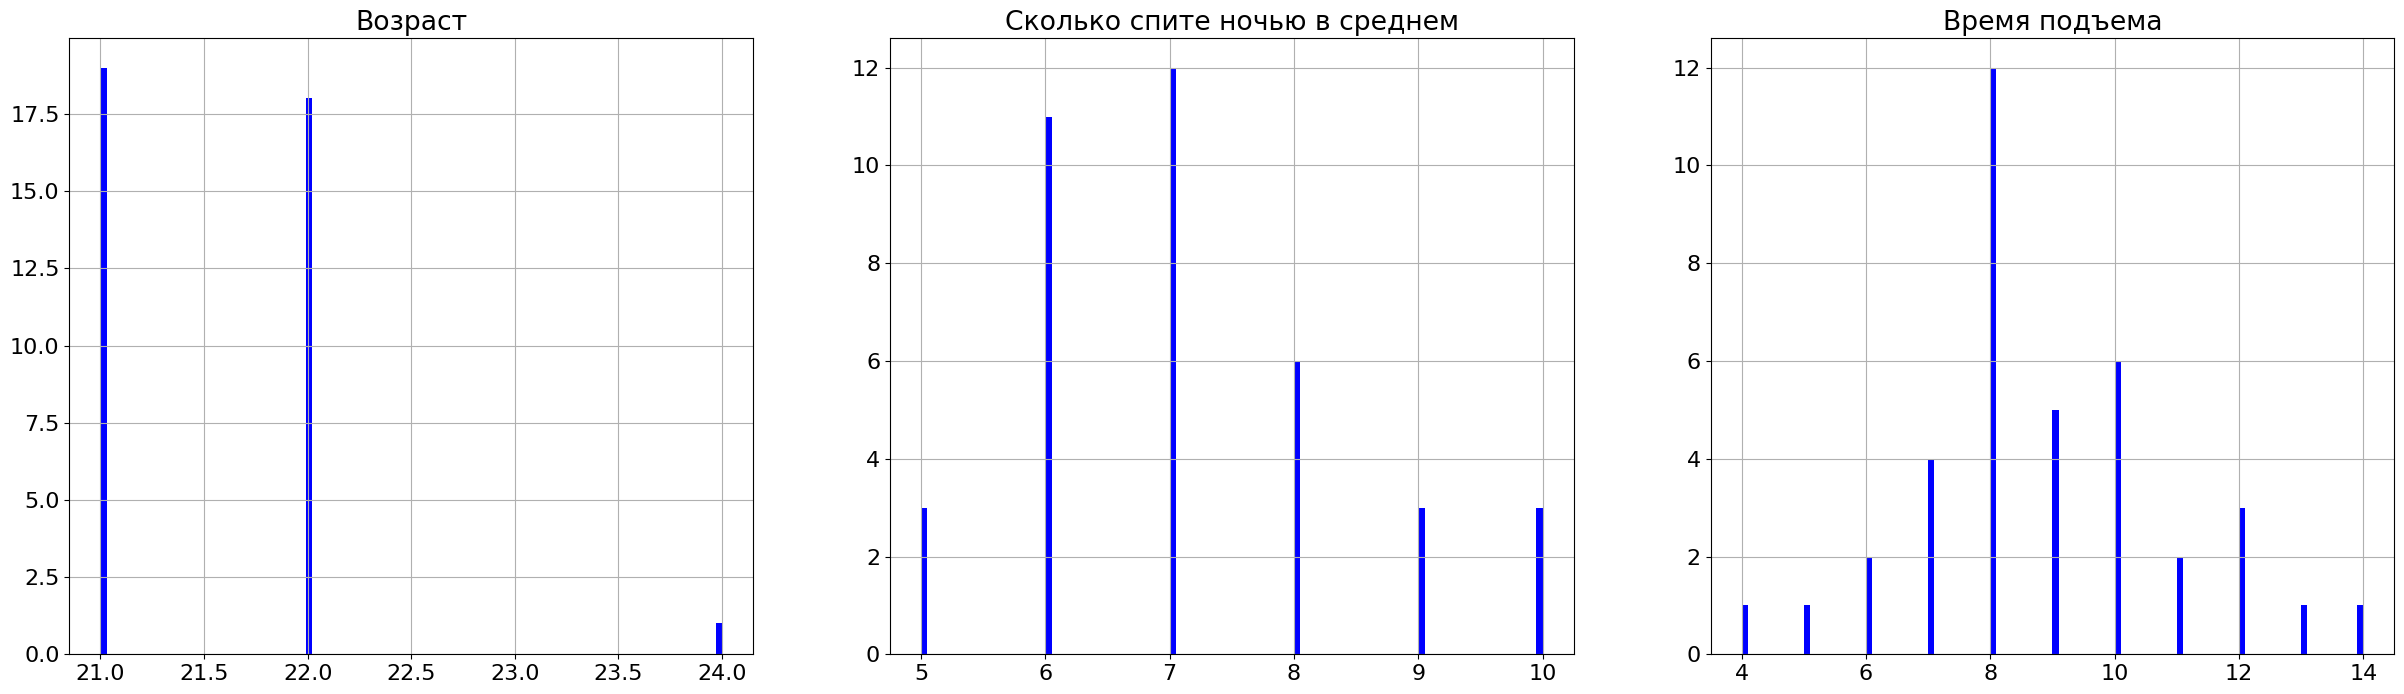

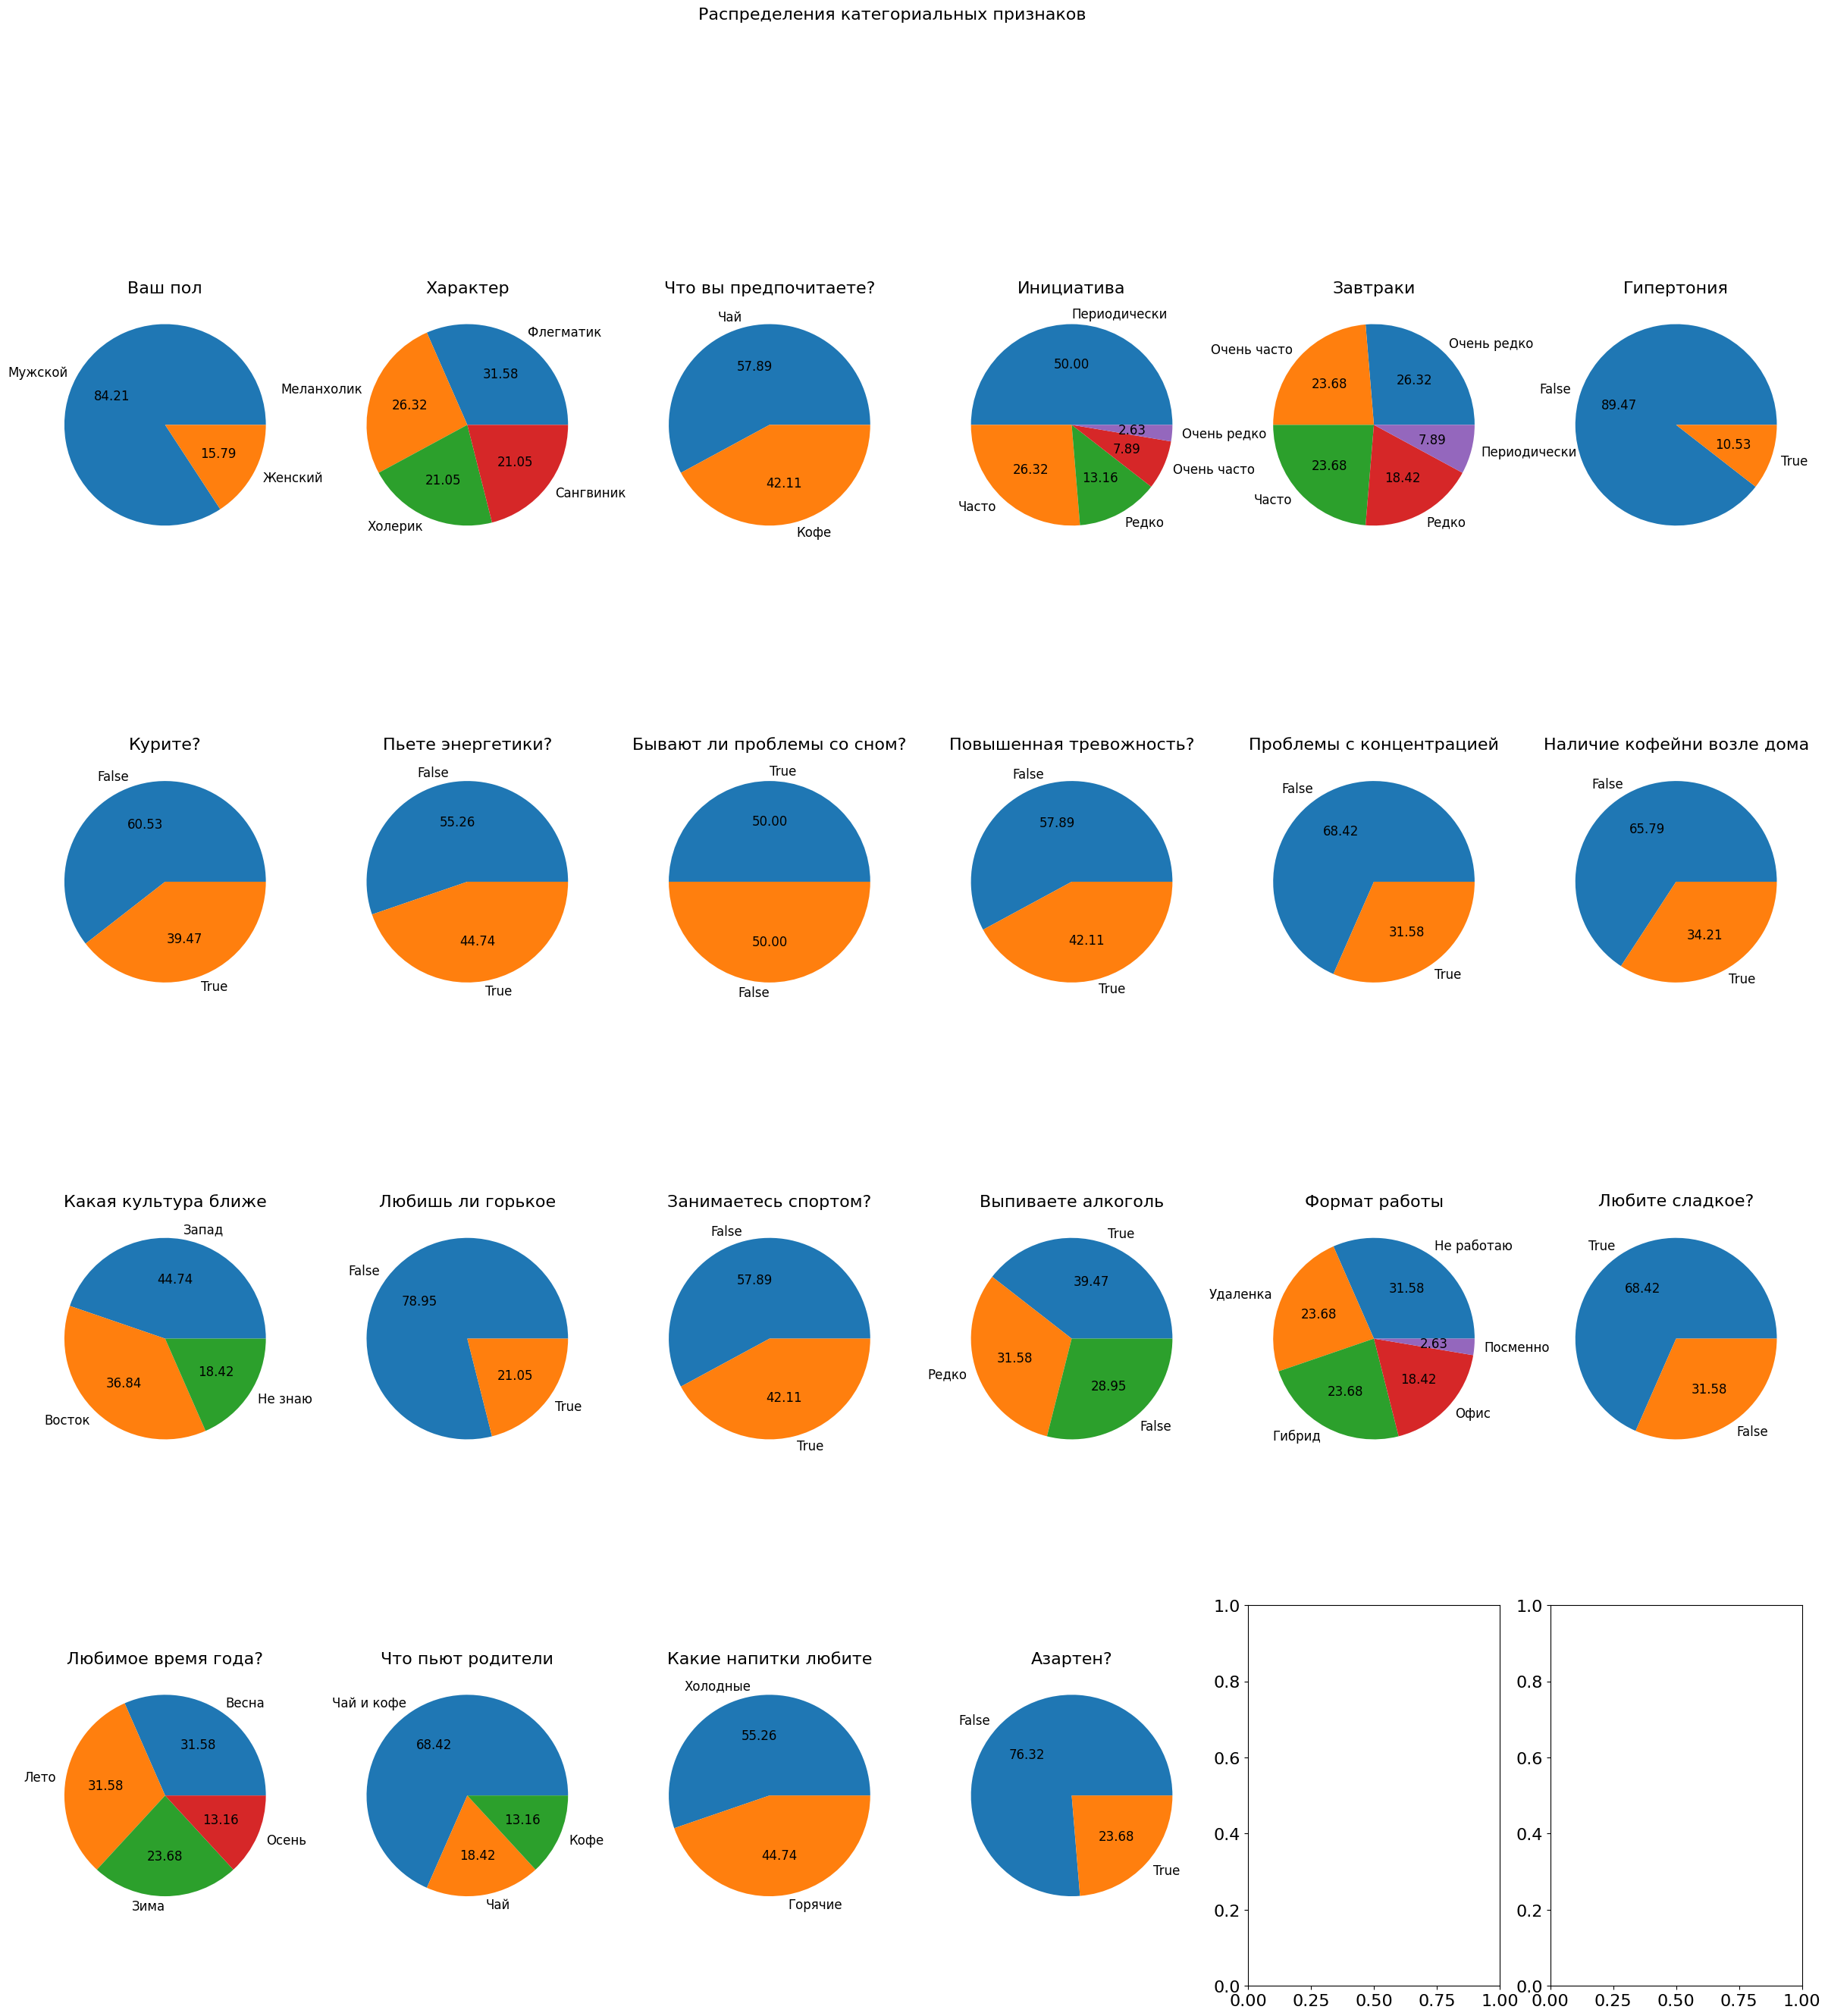

In [22]:
numeric = data[num_cols]
categorial = data[cat_col]

matplotlib.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1, 3, figsize=(30, 8))
ax = ax.ravel()
for i, j in enumerate(numeric.keys()):
    out = ax[i].hist(numeric[j].values, 100, facecolor='b')
    ax[i].set_title(j)
    ax[i].grid(True)
fig, ax = plt.subplots(4, 6, figsize=(30, 30))
ax = ax.ravel()
fig.suptitle('Распределения категориальных признаков', fontsize=16)
for i, j in enumerate(categorial):
    out = ax[i].pie(categorial[j].value_counts(), labels = categorial[j].value_counts().keys(), autopct='%.2f', textprops={'fontsize': 12})
    ax[i].set_title(j, fontsize=16)
plt.show()

In [23]:
data['Родные чай'] = data.apply(lambda x: True if (x['Что пьют родители'] == 'Чай' or x['Что пьют родители'] == 'Чай и кофе') else False, axis = 1)
data['Родные кофе'] = data.apply(lambda x: True if (x['Что пьют родители'] == 'Кофе' or x['Что пьют родители'] == 'Чай и кофе') else False, axis = 1)
data.drop(columns=['Что пьют родители'], inplace=True)

In [24]:
data['Выпиваете алкоголь'] = data.apply(lambda x: (1 if x['Выпиваете алкоголь'] == True else 0.5) if x['Выпиваете алкоголь'] != False else 0, axis = 1)

In [25]:
data['Запад'] = data.apply(lambda x: True if x['Какая культура ближе'] == 'Запад' else False, axis = 1)
data['Восток'] = data.apply(lambda x: True if x['Какая культура ближе'] == 'Восток' else False, axis = 1)
data.drop(columns=['Какая культура ближе'], inplace=True)

In [26]:
def grade(row, column):
  if row[column] == 'Очень редко':
    return 1
  elif row[column] == 'Редко':
    return 2
  elif row[column] == 'Периодически':
    return 3
  elif row[column] == 'Часто':
    return 4
  elif row[column] == 'Очень часто':
    return 5

In [27]:
data['Инициатива'] = data.apply(grade, column='Инициатива', axis=1)
data['Завтраки'] = data.apply(grade, column='Завтраки', axis=1)

In [28]:
data['Чай или кофе'] = data.apply(lambda x: 1 if x['Что вы предпочитаете?'] == 'Чай' else 0, axis = 1)
data.drop(columns=['Что вы предпочитаете?'], inplace=True)

In [48]:
data.head()

,Возраст,Инициатива,Завтраки,Сколько спите ночью в среднем,Гипертония,Курите?,Пьете энергетики?,Бывают ли проблемы со сном?,Повышенная тревожность?,Проблемы с концентрацией,Наличие кофейни возле дома,Любишь ли горькое,Занимаетесь спортом?,Выпиваете алкоголь,Время подъема,Любите сладкое?,Азартен?,Родные чай,Родные кофе,Запад,Восток,Чай или кофе,Ваш пол_Мужской,Характер_Сангвиник,Характер_Флегматик,Характер_Холерик,Формат работы_Не работаю,Формат работы_Офис,Формат работы_Посменно,Формат работы_Удаленка,Любимое время года?_Зима,Любимое время года?_Лето,Любимое время года?_Осень,Какие напитки любите_Холодные
0,22,3,5,10,False,True,True,True,True,True,True,False,False,0.5,12,True,False,True,True,False,True,0,False,False,False,True,True,False,False,False,False,False,False,True
1,22,4,5,6,True,False,False,False,False,False,False,False,False,0.0,6,False,True,True,False,True,False,1,True,False,False,True,False,False,False,True,False,False,False,True
2,22,1,4,6,False,True,True,True,True,True,False,False,False,1.0,7,False,False,False,True,True,False,0,True,False,False,False,False,True,False,False,False,False,False,True
3,22,4,1,6,False,True,False,True,True,True,False,False,False,0.0,12,True,False,True,True,False,False,1,True,False,True,False,False,True,False,False,False,True,False,True
4,21,4,2,8,False,False,False,False,False,False,False,False,True,0.0,8,True,False,True,True,True,False,1,True,False,True,False,False,False,False,True,False,False,True,False


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Ваш пол                        38 non-null     object 
 1   Возраст                        38 non-null     int64  
 2   Характер                       38 non-null     object 
 3   Инициатива                     38 non-null     int64  
 4   Завтраки                       38 non-null     int64  
 5   Сколько спите ночью в среднем  38 non-null     int64  
 6   Гипертония                     38 non-null     bool   
 7   Курите?                        38 non-null     bool   
 8   Пьете энергетики?              38 non-null     bool   
 9   Бывают ли проблемы со сном?    38 non-null     bool   
 10  Повышенная тревожность?        38 non-null     bool   
 11  Проблемы с концентрацией       38 non-null     bool   
 12  Наличие кофейни возле дома     38 non-null     bool 

In [31]:
data = pd.get_dummies(data, drop_first = True)

In [32]:
data.head()

,Возраст,Инициатива,Завтраки,Сколько спите ночью в среднем,Гипертония,Курите?,Пьете энергетики?,Бывают ли проблемы со сном?,Повышенная тревожность?,Проблемы с концентрацией,Наличие кофейни возле дома,Любишь ли горькое,Занимаетесь спортом?,Выпиваете алкоголь,Время подъема,Любите сладкое?,Азартен?,Родные чай,Родные кофе,Запад,Восток,Чай или кофе,Ваш пол_Мужской,Характер_Сангвиник,Характер_Флегматик,Характер_Холерик,Формат работы_Не работаю,Формат работы_Офис,Формат работы_Посменно,Формат работы_Удаленка,Любимое время года?_Зима,Любимое время года?_Лето,Любимое время года?_Осень,Какие напитки любите_Холодные
0,22,3,5,10,False,True,True,True,True,True,True,False,False,0.5,12,True,False,True,True,False,True,0,False,False,False,True,True,False,False,False,False,False,False,True
1,22,4,5,6,True,False,False,False,False,False,False,False,False,0.0,6,False,True,True,False,True,False,1,True,False,False,True,False,False,False,True,False,False,False,True
2,22,1,4,6,False,True,True,True,True,True,False,False,False,1.0,7,False,False,False,True,True,False,0,True,False,False,False,False,True,False,False,False,False,False,True
3,22,4,1,6,False,True,False,True,True,True,False,False,False,0.0,12,True,False,True,True,False,False,1,True,False,True,False,False,True,False,False,False,True,False,True
4,21,4,2,8,False,False,False,False,False,False,False,False,True,0.0,8,True,False,True,True,True,False,1,True,False,True,False,False,False,False,True,False,False,True,False


In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

In [34]:
train, valid = train_test_split(data, test_size = 0.2, random_state = 42)
x_train = train.drop('Чай или кофе', axis = 1)
x_valid = valid.drop('Чай или кофе', axis = 1)

y_train = train['Чай или кофе']
y_valid = valid['Чай или кофе']

In [35]:
gs_kmeans = GridSearchCV(KMeans(random_state=42, max_iter=3000),
                         param_grid = {
                             'n_clusters': [2, 4, 6, 8],
                             'init': ['k-means++', 'random'],
                             'n_init': range(1, 15)
                         },
                         scoring='f1_micro', cv=3, n_jobs=-1)

In [36]:
gs_kmeans.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KMeans(max_iter=3000, random_state=42), n_jobs=-1,
             param_grid={'init': ['k-means++', 'random'],
                         'n_clusters': [2, 4, 6, 8], 'n_init': range(1, 15)},
             scoring='f1_micro')

In [37]:
gs_kmeans.best_params_

{'init': 'k-means++', 'n_clusters': 2, 'n_init': 1}

In [38]:
best_model = gs_kmeans.best_estimator_

In [39]:
print("Homogeneity: {0:0.3f}".format(
    metrics.homogeneity_score(y_train, best_model.labels_)))
print("Completeness: {0:0.3f}".format(
    metrics.completeness_score(y_train, best_model.labels_)))
print("V_measure: {0:0.3f}".format(
    metrics.v_measure_score(y_train, best_model.labels_)))
print("Adjusted random: {0:0.3f}".format(
    metrics.adjusted_rand_score(y_train, best_model.labels_)))
print("Rand Index: {0:0.3f}".format(
    metrics.rand_score(y_train, best_model.labels_)))
print("Silhouette: {0:0.3f}".format(
    metrics.silhouette_score(x_train, best_model.labels_, metric='euclidean', sample_size=300)))
print("Accuracy: {0:0.3f}".format(
    metrics.accuracy_score(y_train, best_model.labels_)))
print("Precision: {0:0.3f}".format(
    metrics.precision_score(y_train, best_model.labels_)))
print("Recall: {0:0.3f}".format(
    metrics.recall_score(y_train, best_model.labels_)))
print("F1: {0:0.3f}".format(
    metrics.f1_score(y_train, best_model.labels_)))
print("Roc auc: {0:0.3f}".format(
    metrics.roc_auc_score(y_train, best_model.labels_)))

Homogeneity: 0.153
Completeness: 0.151
V_measure: 0.152
Adjusted random: 0.131
Rand Index: 0.566
Silhouette: 0.123
Accuracy: 0.700
Precision: 0.846
Recall: 0.611
F1: 0.710
Roc auc: 0.722


In [40]:
predict = best_model.predict(x_valid)

In [41]:
print("Test Homogeneity: {0:0.3f}".format(
    metrics.homogeneity_score(y_valid, predict)))
print("Test Completeness: {0:0.3f}".format(
    metrics.completeness_score(y_valid, predict)))
print("Test V_measure: {0:0.3f}".format(
    metrics.v_measure_score(y_valid, predict)))
print("Test Adjusted random: {0:0.3f}".format(
    metrics.adjusted_rand_score(y_valid, predict)))
print("Test Rand Index info: {0:0.3f}".format(
    metrics.rand_score(y_valid, predict)))
print("Test Silhouette: {0:0.3f}".format(
    metrics.silhouette_score(x_valid, predict, metric='euclidean', sample_size=300)))
print("Test Accuracy info: {0:0.3f}".format(
    metrics.accuracy_score(y_valid, predict)))
print("Test Precision info: {0:0.3f}".format(
    metrics.precision_score(y_valid, predict)))
print("Test Recall info: {0:0.3f}".format(
    metrics.recall_score(y_valid, predict)))
print("Test F1 info: {0:0.3f}".format(
    metrics.f1_score(y_valid, predict)))
print("Test Roc auc info: {0:0.3f}".format(
    metrics.roc_auc_score(y_valid, predict)))

Test Homogeneity: 0.049
Test Completeness: 0.051
Test V_measure: 0.050
Test Adjusted random: -0.082
Test Rand Index info: 0.464
Test Silhouette: 0.144
Test Accuracy info: 0.625
Test Precision info: 0.600
Test Recall info: 0.750
Test F1 info: 0.667
Test Roc auc info: 0.625


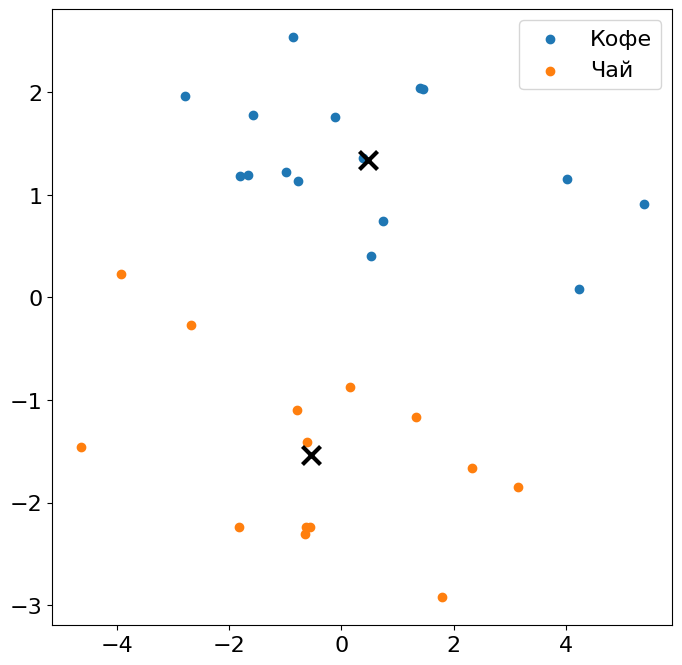

In [42]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(2)
reduced_data = pca.fit_transform(x_train)
best_model.fit(reduced_data)

# Calculating the centroids
centroids = best_model.cluster_centers_
label = best_model.fit_predict(reduced_data)
unique_labels = np.unique(label)

# plotting the clusters:
plt.figure(figsize=(8, 8))
for i in unique_labels:
    plt.scatter(reduced_data[label == i, 0],
                reduced_data[label == i, 1],
                label=i)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)
plt.legend(['Кофе', 'Чай'])
plt.show()

In [43]:
cb = CatBoostClassifier(random_state=42)
cb.fit(x_train, y_train)

Learning rate set to 0.002305
0:	learn: 0.6916954	total: 143ms	remaining: 2m 22s
1:	learn: 0.6901477	total: 145ms	remaining: 1m 12s
2:	learn: 0.6888458	total: 147ms	remaining: 48.9s
3:	learn: 0.6878490	total: 150ms	remaining: 37.5s
4:	learn: 0.6867033	total: 152ms	remaining: 30.2s
5:	learn: 0.6852059	total: 155ms	remaining: 25.6s
6:	learn: 0.6837556	total: 158ms	remaining: 22.3s
7:	learn: 0.6819683	total: 160ms	remaining: 19.8s
8:	learn: 0.6806921	total: 162ms	remaining: 17.9s
9:	learn: 0.6797230	total: 163ms	remaining: 16.2s
10:	learn: 0.6780296	total: 165ms	remaining: 14.8s
11:	learn: 0.6768820	total: 166ms	remaining: 13.7s
12:	learn: 0.6749510	total: 168ms	remaining: 12.8s
13:	learn: 0.6735464	total: 169ms	remaining: 11.9s
14:	learn: 0.6722980	total: 171ms	remaining: 11.2s
15:	learn: 0.6713404	total: 172ms	remaining: 10.6s
16:	learn: 0.6699613	total: 174ms	remaining: 10s
17:	learn: 0.6690029	total: 174ms	remaining: 9.51s
18:	learn: 0.6676482	total: 176ms	remaining: 9.06s
19:	learn: 

In [44]:
predict_cb = cb.predict(x_valid)

In [47]:
predict_cb

array([0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [45]:
print("Test Homogeneity: {0:0.3f}".format(
    metrics.homogeneity_score(y_valid, predict_cb)))
print("Test Completeness: {0:0.3f}".format(
    metrics.completeness_score(y_valid, predict_cb)))
print("Test V_measure: {0:0.3f}".format(
    metrics.v_measure_score(y_valid, predict_cb)))
print("Test Adjusted random: {0:0.3f}".format(
    metrics.adjusted_rand_score(y_valid, predict_cb)))
print("Test Rand Index info: {0:0.3f}".format(
    metrics.rand_score(y_valid, predict_cb)))
print("Test Silhouette: {0:0.3f}".format(
    metrics.silhouette_score(x_valid, predict_cb, metric='euclidean', sample_size=300)))
print("Test Accuracy info: {0:0.3f}".format(
    metrics.accuracy_score(y_valid, predict_cb)))
print("Test Precision info: {0:0.3f}".format(
    metrics.precision_score(y_valid, predict_cb)))
print("Test Recall info: {0:0.3f}".format(
    metrics.recall_score(y_valid, predict_cb)))
print("Test F1 info: {0:0.3f}".format(
    metrics.f1_score(y_valid, predict_cb)))
print("Test Roc auc info: {0:0.3f}".format(
    metrics.roc_auc_score(y_valid, predict_cb)))

Test Homogeneity: 0.138
Test Completeness: 0.254
Test V_measure: 0.179
Test Adjusted random: 0.000
Test Rand Index info: 0.464
Test Silhouette: 0.180
Test Accuracy info: 0.625
Test Precision info: 0.571
Test Recall info: 1.000
Test F1 info: 0.727
Test Roc auc info: 0.625
